<a href="https://colab.research.google.com/github/ritammajumdar/Terrorism_Data_Analysis/blob/main/TerrorismData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK**

As a security analyst,I have to find out the hot zone of terrorism by performing exploratory data analysis on dataset 'Global Terrorism'

**Dataset link:** https://bit.ly/2TK5Xn5

**Author:**
RITAM MAJUMDAR

**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Importing Dataset**

In [ ]:
data=pd.read_csv(r'/content/globalterrorismdb_0718dist.csv',encoding='latin1')

In [ ]:
print(data.shape)

(181691, 135)


In [ ]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

**Extracting Important Columns**

In [ ]:
df=data[['iyear','imonth','iday','country_txt','provstate','region_txt','city','latitude','longitude','attacktype1_txt','nkill','nwound','targtype1_txt','summary','gname','target1','weaptype1_txt','motive']]
df

,iyear,imonth,iday,country_txt,provstate,region_txt,city,latitude,longitude,attacktype1_txt,nkill,nwound,targtype1_txt,summary,gname,target1,weaptype1_txt,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Private Citizens & Property,NaN,MANO-D,Julio Guzman,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,Government (Diplomatic),NaN,23rd of September Communist League,"Nadine Chaval, daughter",Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Journalists & Media,NaN,Unknown,Employee,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Government (Diplomatic),NaN,Unknown,U.S. Embassy,Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),NaN,Unknown,U.S. Consulate,Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Military,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Checkpoint,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Military,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Hmeymim Air Base,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Private Citizens & Property,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Houses,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Government (General),12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Office,Explosives,NaN


In [ ]:
df['nkill']=df['nkill'].fillna(0)
df['nwound']=df['nwound'].fillna(0)
df['casualties']=df['nkill']+df['nwound']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   provstate        181270 non-null  object 
 5   region_txt       181691 non-null  object 
 6   city             181257 non-null  object 
 7   latitude         177135 non-null  float64
 8   longitude        177134 non-null  float64
 9   attacktype1_txt  181691 non-null  object 
 10  nkill            181691 non-null  float64
 11  nwound           181691 non-null  float64
 12  targtype1_txt    181691 non-null  object 
 13  summary          115562 non-null  object 
 14  gname            181691 non-null  object 
 15  target1          181055 non-null  object 
 16  weaptype1_txt    181691 non-null  obje

In [ ]:
df.head()

,iyear,imonth,iday,country_txt,provstate,region_txt,city,latitude,longitude,attacktype1_txt,nkill,nwound,targtype1_txt,summary,gname,target1,weaptype1_txt,motive,casualties
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Private Citizens & Property,NaN,MANO-D,Julio Guzman,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,Government (Diplomatic),NaN,23rd of September Communist League,"Nadine Chaval, daughter",Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Journalists & Media,NaN,Unknown,Employee,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,Government (Diplomatic),NaN,Unknown,U.S. Embassy,Explosives,NaN,0.0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,Government (Diplomatic),NaN,Unknown,U.S. Consulate,Incendiary,NaN,0.0


In [ ]:
df.tail()

,iyear,imonth,iday,country_txt,provstate,region_txt,city,latitude,longitude,attacktype1_txt,nkill,nwound,targtype1_txt,summary,gname,target1,weaptype1_txt,motive,casualties
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Military,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Checkpoint,Firearms,NaN,3.0
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Military,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Hmeymim Air Base,Explosives,NaN,9.0
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Private Citizens & Property,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Houses,Incendiary,NaN,0.0
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Government (General),12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Office,Explosives,NaN,0.0
181690,2017,12,31,Philippines,Maguindanao,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,0.0,Unknown,12/31/2017: An explosive device was discovered...,Unknown,Unknown,Explosives,NaN,0.0


In [ ]:
df['casualties'].count()

181691

In [ ]:
df.describe()

,iyear,imonth,iday,latitude,longitude,nkill,nwound,casualties
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [ ]:
df.corr()

,iyear,imonth,iday,latitude,longitude,nkill,nwound,casualties
iyear,1.000000,0.000139,0.018254,0.166933,0.003917,0.021252,0.017484,0.020675
imonth,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.004031,0.003178,0.003805
iday,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003225,-0.001082,-0.001808
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.013170,0.015920,0.009899
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000587,0.000205,0.000013
nkill,0.021252,0.004031,-0.003225,-0.013170,-0.000587,1.000000,0.443326,0.651885
nwound,0.017484,0.003178,-0.001082,0.015920,0.000205,0.443326,1.000000,0.968724
casualties,0.020675,0.003805,-0.001808,0.009899,0.000013,0.651885,0.968724,1.000000


**Data Visualization**

In [ ]:
import seaborn as sns

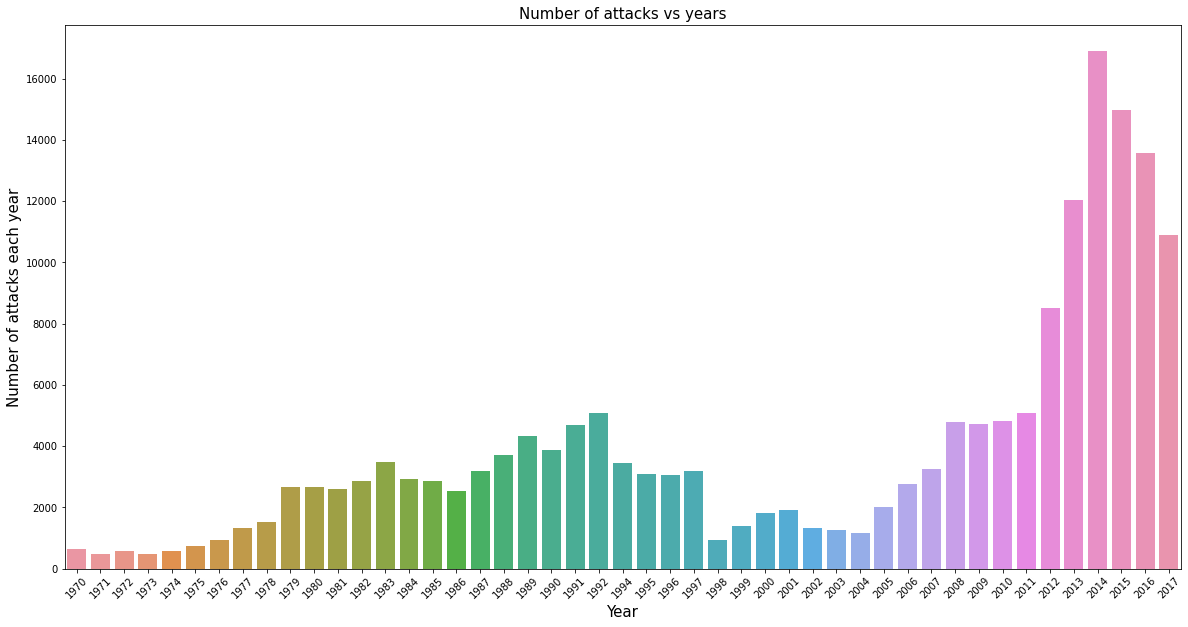

In [ ]:
x=df['iyear'].unique()
y = df['iyear'].value_counts(dropna = False).sort_index()
plt.figure(figsize=(20,10))
sns.barplot(x,y)
plt.xticks(rotation = 45)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Number of attacks each year",fontsize=15)
plt.title("Number of attacks vs years",fontsize=15)
plt.show()

In [ ]:
Reg=df['region_txt'].unique()
df1=df.groupby(['region_txt'])
x=df1['region_txt'].count()
print(x)

region_txt
Australasia & Oceania            282
Central America & Caribbean    10344
Central Asia                     563
East Asia                        802
Eastern Europe                  5144
Middle East & North Africa     50474
North America                   3456
South America                  18978
South Asia                     44974
Southeast Asia                 12485
Sub-Saharan Africa             17550
Western Europe                 16639
Name: region_txt, dtype: int64


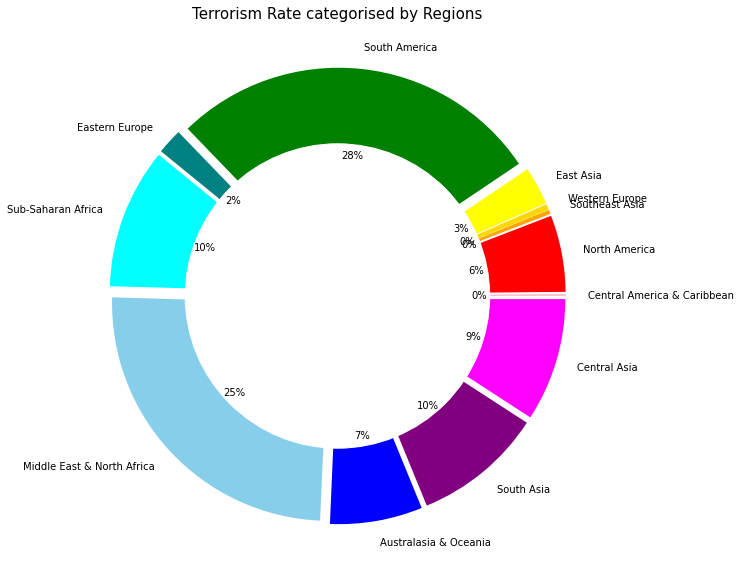

In [ ]:
e = np.full(x.shape, 0.05)
c = ['pink','red','orange','gold','yellow','green','teal','cyan', 'skyblue', 'blue','purple','magenta']
plt.figure(figsize = (20,10))
plt.pie(x, labels = Reg, autopct='%1.0f%%', explode=e, colors=c)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Terrorism Rate categorised by Regions', fontsize=15)
plt.show()

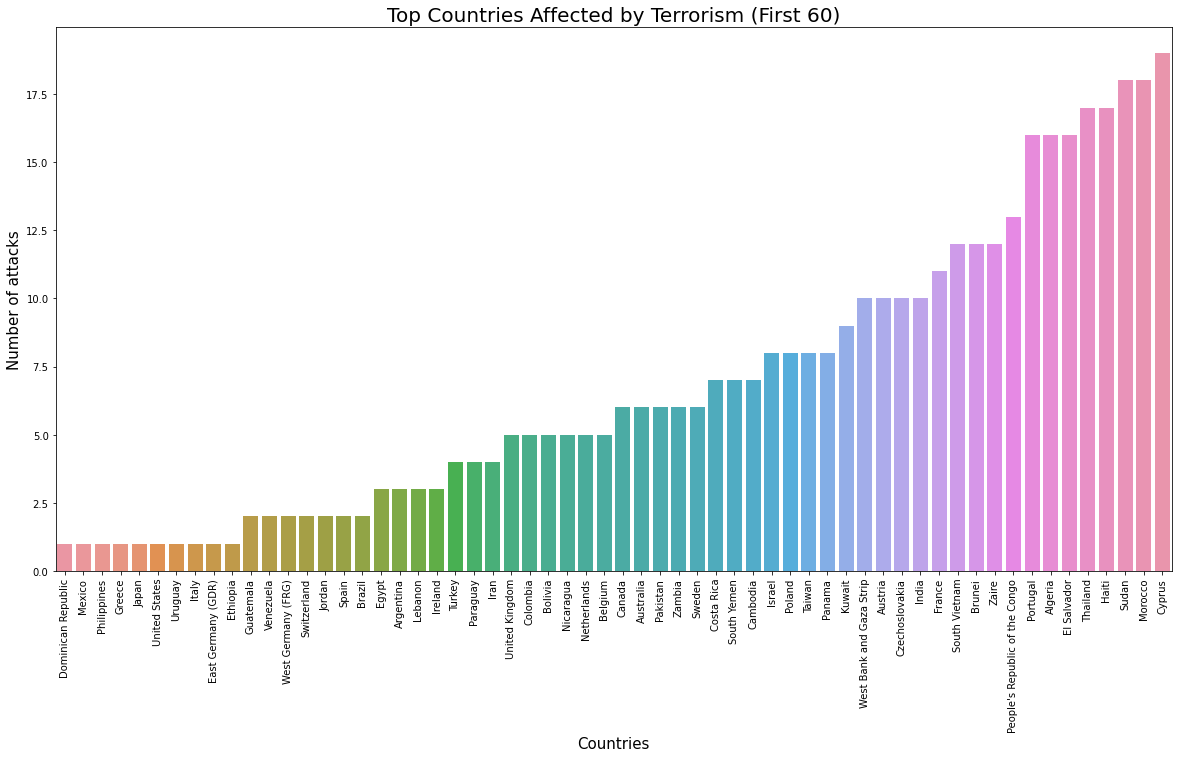

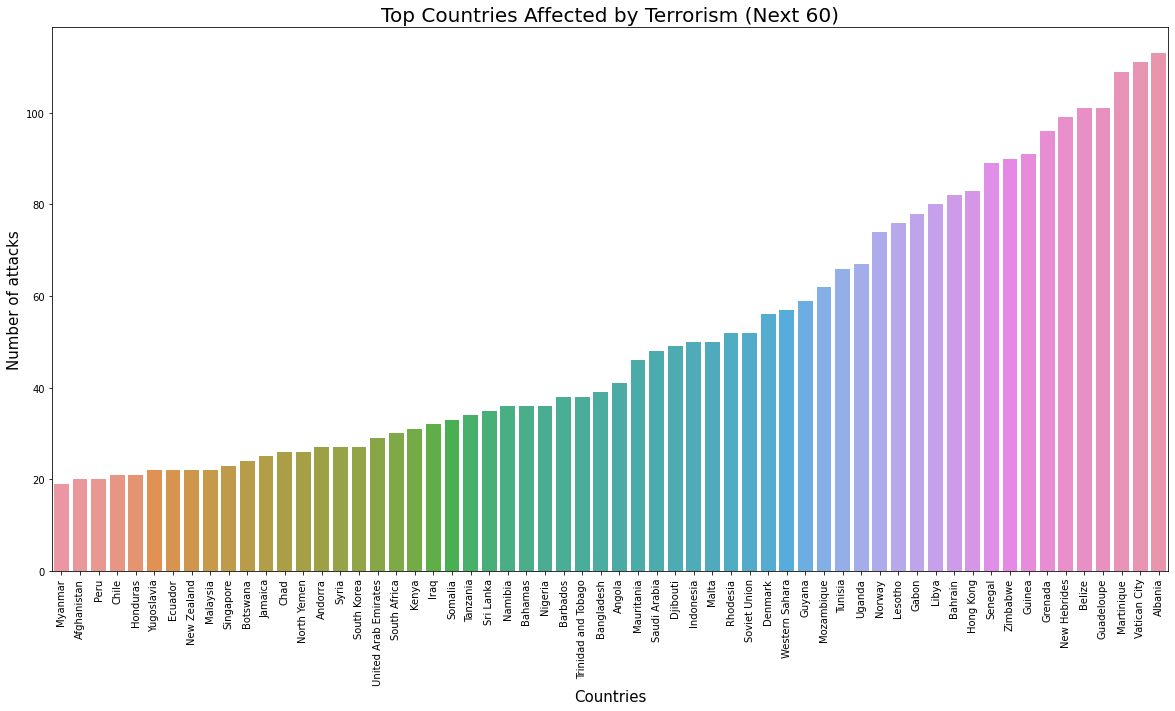

In [ ]:
x=df['country_txt'].unique()
df1=df.groupby(['country_txt'])
y = df1['country_txt'].count().sort_values()

plt.subplots(figsize=(20,10))
sns.barplot(x[0:60],y[0:60])
plt.title('Top Countries Affected by Terrorism (First 60)',fontsize=20)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Number of attacks',fontsize=15)
plt.xticks(rotation= 90, fontsize=10)
plt.show()

plt.subplots(figsize=(20,10))
sns.barplot(x[60:120],y[60:120])
plt.title('Top Countries Affected by Terrorism (Next 60)',fontsize=20)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Number of attacks',fontsize=15)
plt.xticks(rotation= 90, fontsize=10)
plt.show()


In [ ]:
df['country_txt'].count()

10

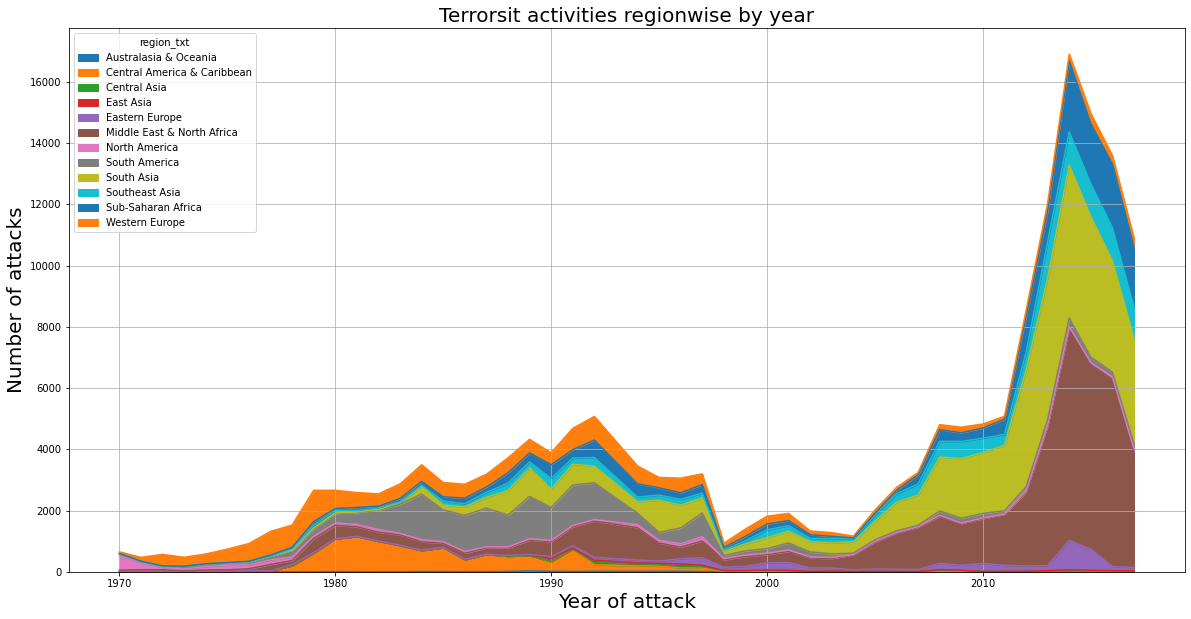

In [ ]:
pd.crosstab(df.iyear,df.region_txt).plot(kind='area',figsize=(20,10))
plt.title("Terrorsit activities regionwise by year",fontsize=20)
plt.xlabel("Year of attack",fontsize=20)
plt.ylabel("Number of attacks",fontsize=20)
plt.grid(True)
plt.show()

In [ ]:
weapondata=df['weaptype1_txt'].value_counts()
weapondata

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

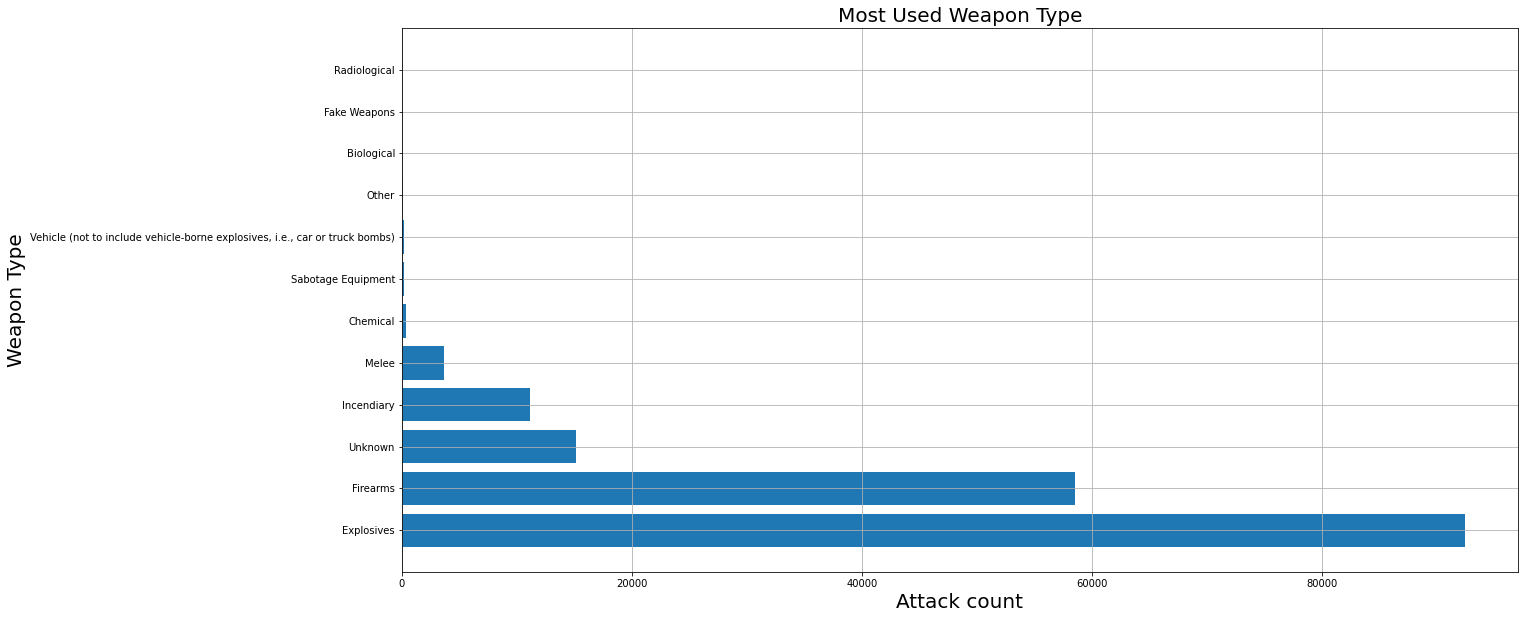

In [ ]:
plt.figure(figsize= (20,10))
plt.barh(weapondata.index, weapondata.values)
plt.title('Most Used Weapon Type',fontsize=20)
plt.xlabel('Attack count',fontsize=20)
plt.ylabel('Weapon Type',fontsize=20)
plt.grid(True)
plt.show()

In [ ]:
city = df['city'].value_counts().drop('Unknown').head(20)
print(city)

Baghdad           7589
Karachi           2652
Lima              2359
Mosul             2265
Belfast           2171
Santiago          1621
Mogadishu         1581
San Salvador      1558
Istanbul          1048
Athens            1019
Bogota             984
Kirkuk             925
Beirut             918
Medellin           848
Benghazi           840
Peshawar           819
Quetta             803
Guatemala City     755
Baqubah            745
Kabul              738
Name: city, dtype: int64


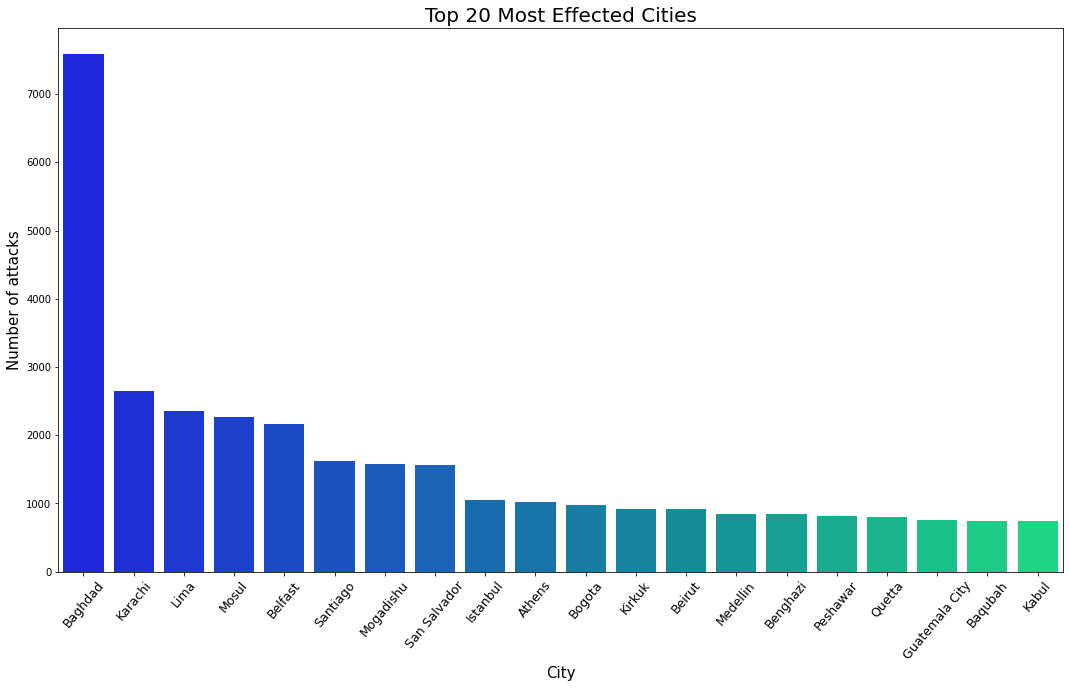

In [ ]:
plt.figure(figsize=(18,10))
sns.barplot(x=city.index, y=city.values, palette='winter')
plt.xticks(rotation = 50,fontsize=12.5)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Top 20 Most Effected Cities",fontsize=20)
plt.show()

In [ ]:
terrorist_group = df['gname'].value_counts().drop('Unknown').head(20)
print(terrorist_group)

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

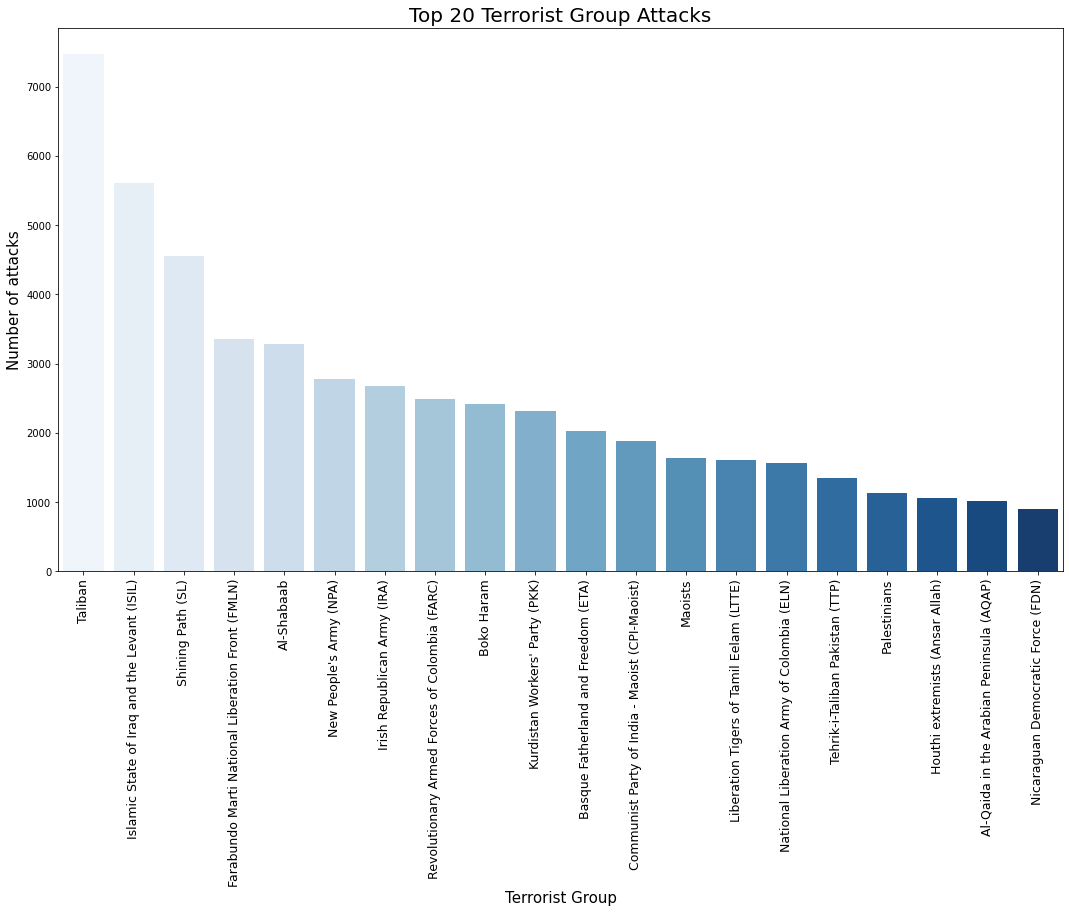

In [ ]:
plt.figure(figsize=(18,10))
sns.barplot(x=terrorist_group.index, y=terrorist_group.values, palette='Blues')
plt.xticks(rotation = 90,fontsize=12.5)
plt.xlabel("Terrorist Group",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Top 20 Terrorist Group Attacks",fontsize=20)
plt.show()

In [ ]:
Attack = df['attacktype1_txt'].value_counts().drop('Unknown')
print(Attack)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64


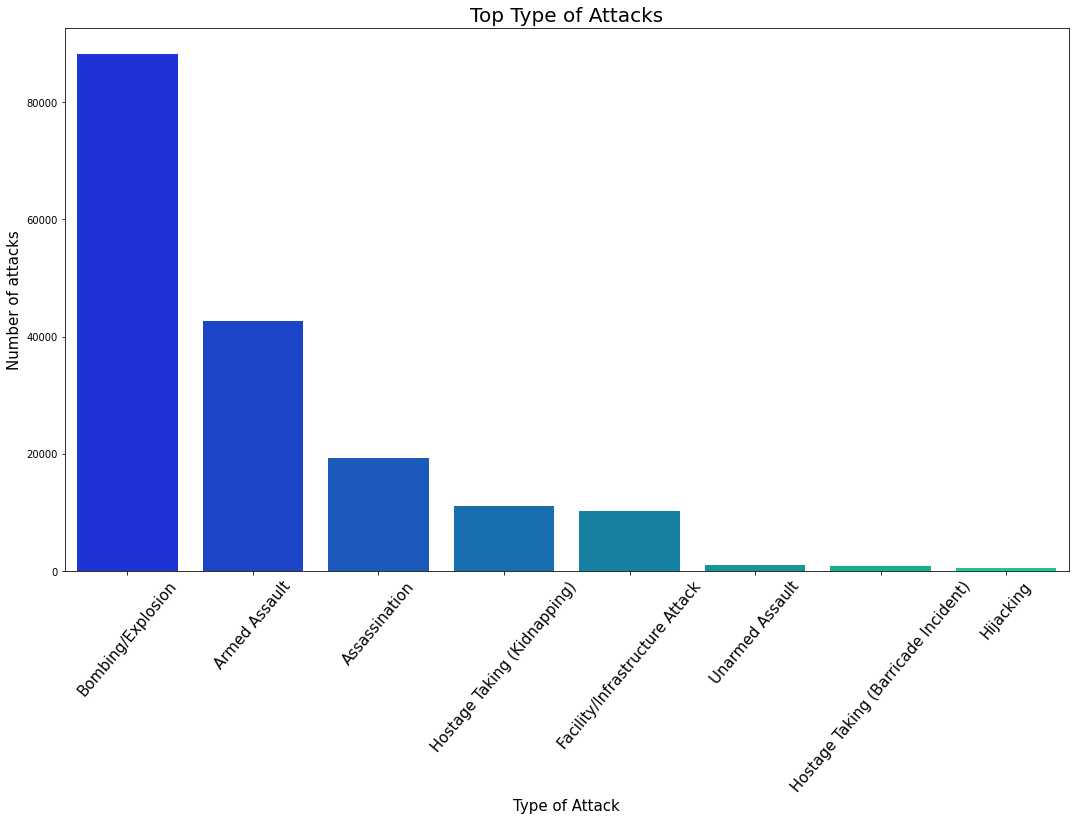

In [ ]:
plt.figure(figsize=(18,10))
sns.barplot(x=Attack.index, y=Attack.values, palette='winter')
plt.xticks(rotation = 50,fontsize=15)
plt.xlabel("Type of Attack",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Top Type of Attacks",fontsize=20)
plt.show()

In [ ]:
Targetdata = df['targtype1_txt'].value_counts().nlargest(n=15)
Targetdata

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Name: targtype1_txt, dtype: int64

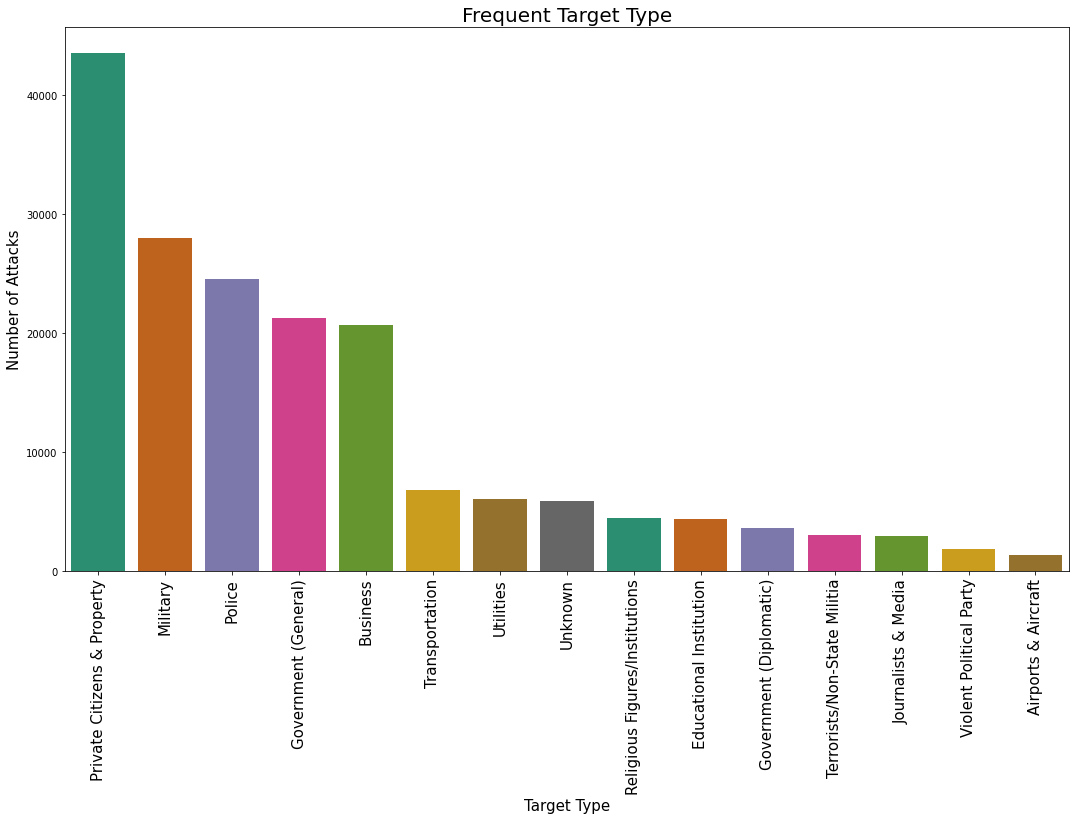

In [ ]:
plt.figure(figsize= (18,10))
sns.barplot(x = Targetdata.index , y = Targetdata.values, palette='Dark2')
plt.title('Frequent Target Type',fontsize=20)
plt.xlabel('Target Type',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation = 90, fontsize=15)
plt.show()

In [ ]:
killed = df[['attacktype1_txt','nkill']].groupby(['attacktype1_txt'],axis=0).sum()
killed

,nkill
attacktype1_txt,
Armed Assault,160297.0
Assassination,24920.0
Bombing/Explosion,157321.0
Facility/Infrastructure Attack,3642.0
Hijacking,3718.0
Hostage Taking (Barricade Incident),4478.0
Hostage Taking (Kidnapping),24231.0
Unarmed Assault,880.0
Unknown,32381.0


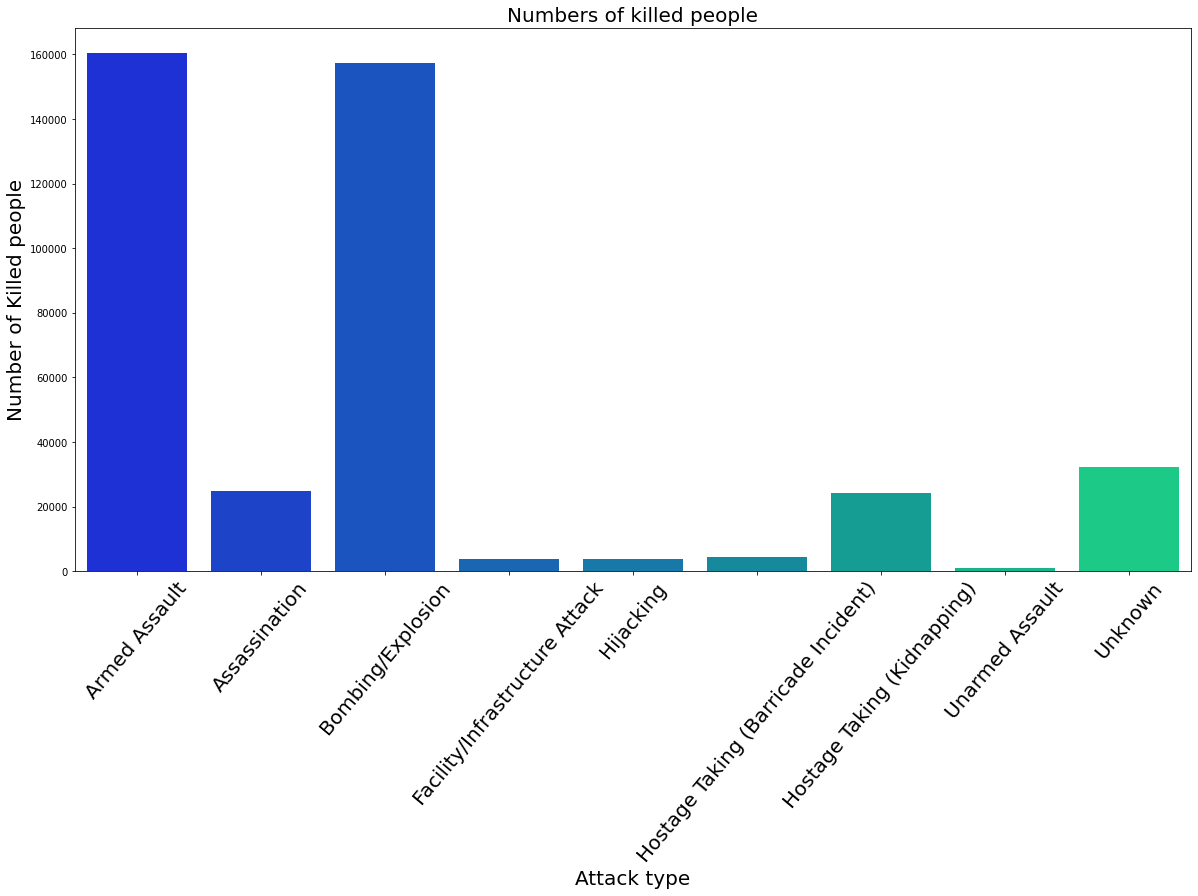

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x = killed.index, y = killed['nkill'] , palette='winter')
plt.title("Numbers of killed people",fontsize=20)
plt.ylabel('Number of Killed people',fontsize=20)
plt.xlabel('Attack type',fontsize=20)
plt.xticks(rotation=50, fontsize=20)
plt.show()

In [ ]:
df=df[['gname','country_txt','nkill']]
df=df.groupby(['gname','country_txt'],axis=0).sum().sort_values('nkill',ascending=False).drop('Unknown').reset_index().head(10)
df

,gname,country_txt,nkill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [ ]:
kill = df.loc[:,'nkill']
print('Total people killed by terror attack:', int(sum(kill.dropna())))

Total people killed by terror attack: 135489


In [ ]:
countryKill = df.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKill

country_txt,Afghanistan,El Salvador,Iraq,Nicaragua,Nigeria,Pakistan,Peru,Somalia,Sri Lanka,Syria
nkill,29269.0,8019.0,31058.0,6630.0,16917.0,6014.0,11595.0,8176.0,10928.0,6883.0


**Conclusions**

Country with most kills: Iraq with 31058 kills

Most harmful attack : Armed Assault with 160297 kills

Most frequent target : Private citizen and Private property

Largest number of attacks : Bombing/Explosion with the number  88255

Most frequent attacking groups : Taliban with  7478 attacks,Islamic State of Iraq and the Levant (ISIL) with 5613 attacks,Shining Path (SL) with 4555 attacks

Most attacked regions : South America(18978 attacks),South Asia(44974 attacks), Middle East and North America(50474 attacks)

Most attacked cities: Baghdad with 7589 attacks , Karachi with 2652 attacks , 
Lima with 2359 attacks

Most attacks were happened in 2014 and least attacks were happened in 1971 and 1973

**Security Measures**

We can clearly see from our vizualization that private citizens and properties are most targeted in all the attacks . So first,we need to secure them. We can give access of CCTV cameras and security numbers to the private persons for their safety. We have to increase numbers of well equiped security,militaries in most targeted areas. Govenments should stay alert always in the most targeted countries and regions. In any suspicious situation , somebody should call the police or cops. For example, an unattended suitcase on a train platform does not necessarily mean anything sinister. Still, the best course of action is to notify a member of staff straight away. Or call the police.